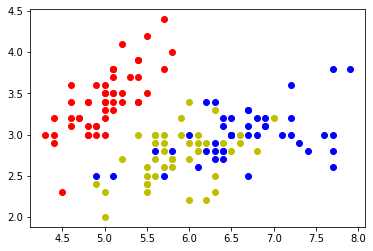

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.loadtxt('sml/datasets/ldaData.txt', usecols=0)
y = np.loadtxt('sml/datasets/ldaData.txt', usecols=1)
data = np.loadtxt('sml/datasets/ldaData.txt')
plt.plot(x[:50], y[:50], 'ro')
plt.plot(x[50:93], y[50:93], 'yo')
plt.plot(x[93:], y[93:], 'bo')


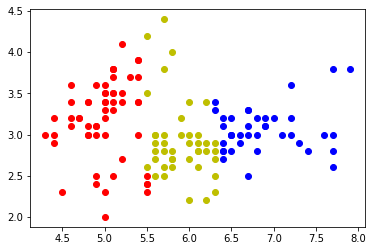

In [3]:
class LDA():
    def compute_params(self, data):
        # means for each class
        means = [data[:50].mean(axis=0), data[50:93].mean(axis=0), data[93:].mean(axis=0)]
        total_mean = data.mean(axis=0)

        # between class covariance
        S_B = 50 * np.outer((means[0] - total_mean), (means[0] - total_mean)) \
                + 43 * np.outer((means[1] - total_mean), (means[1] - total_mean)) \
                + 44 * np.outer((means[2] - total_mean), (means[2] - total_mean))
        
        # within class covariance
        S_W = np.zeros((data.shape[1], data.shape[1]))
        for i in range(0, 50): # class 1
            S_W += np.outer((data[i] - means[0]), (data[i] - means[0]))
        for i in range(50, 93): # class 1
            S_W += np.outer((data[i] - means[1]), (data[i] - means[1]))
        for i in range(93, len(data)): # class 1
            S_W += np.outer((data[i] - means[2]), (data[i] - means[2]))
        
        # eigenvalues
        eigenvalues, eigenvectors = np.linalg.eig(np.linalg.pinv((S_W))@S_B)
        
        self.means = means
        self.w = eigenvalues
    
        
    
    # model a multivariate Gaussian distribution for the projections
    def bayes_classifier(self, data):
        classes = [[], [], []]
        
        #compute prior, projections of data points, means and covariances
        priors = [50/len(data), 43/len(data), 44/len(data)]
        projections = data@self.w
        means = [np.mean(projections[:50]), np.mean(projections[50:93]), np.mean(projections[93:])]
        covariances = [np.cov(projections[:50]).item(), np.cov(projections[50:93]).item(), np.cov(projections[93:]).item()]
        
        # get the posterior distribution for each class
        for point in data:
            proj = self.w.T@point
            posterior_c1 = self.gaussian(proj, means[0], covariances[0]) * priors[0]
            posterior_c2 = self.gaussian(proj, means[1], covariances[1]) * priors[1]
            posterior_c3 = self.gaussian(proj, means[2], covariances[2]) * priors[2]
            
            # classify according to biggest posterior
            if posterior_c1 > posterior_c2 and posterior_c1 > posterior_c3:
                classes[0].append(point)
            elif posterior_c2 > posterior_c3:
                classes[1].append(point)
            else:
                classes[2].append(point)
                
        return classes
        
    
    def gaussian(self, point, mean, variance):
        return 1./(np.sqrt(2*np.pi*variance)) * np.exp(-(point - mean)**2/(2*variance))
    
    

lda = LDA()
lda.compute_params(data)
classes = lda.bayes_classifier(data)

x1 = [x[0] for x in classes[0]]
y1 = [x[1] for x in classes[0]]
plt.plot(x1, y1, 'ro')

x2 = [x[0] for x in classes[1]]
y2 = [x[1] for x in classes[1]]
plt.plot(x2, y2, 'yo')

x3 = [x[0] for x in classes[2]]
y3 = [x[1] for x in classes[2]]
plt.plot(x3, y3, 'bo')
plt.savefig('lda_v2')